In [5]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Times']})
plt.rc('axes', labelcolor='k', edgecolor='w')
#plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

Velocity channel maps for lines:
* $^{29}$SiO $v=5$
* H2O $E_U$ $= ~4800 K$
* SiO $v=2$
* SiO $v=7$
* CO $v=1$

And... see if I missed any. Do we have access to another SiO line that has high $E_U$?

In [8]:
file_SiO_v2_ep1 = 'WHya_SiO_v2.clean.image.fits'
file_SiO_v2_ep2 = 'WHya_ep2_SiO_v-2.clean.image.fits'

file_H2O_ep1 = 'WHya_H2O.clean.image.fits'
file_H2O_ep2 = 'WHya_ep2_H2O.clean.image.fits'

In [9]:
'''H2O_ep1_hdu = fits.open('../data/fits/epoch1/' + file_H2O_ep1)
H2O_ep2_hdu = fits.open('../data/fits/epoch2/' + file_H2O_ep2)

H2O_ep1_data = H2O_ep1_hdu[0].data
H2O_ep2_data = H2O_ep2_hdu[0].data

print(H2O_ep2_data.shape)
# computing these only for one of them, will use this to uniformly color the maps
mean, median, std = sigma_clipped_stats(H2O_ep1_data)'''

"H2O_ep1_hdu = fits.open('../data/fits/epoch1/' + file_H2O_ep1)\nH2O_ep2_hdu = fits.open('../data/fits/epoch2/' + file_H2O_ep2)\n\nH2O_ep1_data = H2O_ep1_hdu[0].data\nH2O_ep2_data = H2O_ep2_hdu[0].data\n\nprint(H2O_ep2_data.shape)\n# computing these only for one of them, will use this to uniformly color the maps\nmean, median, std = sigma_clipped_stats(H2O_ep1_data)"

In [30]:
zero_point_offset = -5 # It starts at -25 km/s

def make_channel_map(file_name, epoch=1):
    print("Making map for ", file_name.replace('.clean.image.fits', ''))
    cube_data = None # not good practice but I need it
    if epoch == 1:
        cube_hdu = fits.open('../data/fits/epoch1/' + file_name)
        cube_data = cube_hdu[0].data
        print(cube_data.shape)
    elif epoch == 2:
        cube_hdu = fits.open('../data/fits/epoch2/' + file_name)
        cube_data = cube_hdu[0].data
    vels = np.linspace(24, 56, 16) # 16 items
    vchans = vels + zero_point_offset
    print('The vels are', vels)
    #vels_to_plot = [star_hrv - i for i in vels] + star_hrv + [star_hrv + i for i in vels]
    # the velocity-channel map will display velocities at these values

    star_center = (254, 246)

    # Nov 2015

    fig, axes = plt.subplots(4, 4, figsize=(17, 16), sharex=True, sharey=True)
    for i in range(4):
        for j in range(4):
            axes[i, j].minorticks_on()
            global max_value
            max_value = np.max(cube_data, axis=(1, 2, 3))
            im = axes[i, j].imshow(cube_data[0, round(vchans[i*4 + j])], vmin=0, vmax=max_value,
                              cmap='Spectral_r')

            axes[i, j].tick_params(axis='both', which='minor', direction='in', colors='w', length=4, labelsize=16)
            axes[i, j].tick_params(axis='both', which='major', direction='in', colors='w', length=8, labelsize=16)

            axes[i, j].set_xlim(star_center[0]-40, star_center[0]+40)
            axes[i, j].set_ylim(star_center[1]-40, star_center[1]+40)

            axes[i, j].text(225, 275, s=str(round(vels[i*4 +j])) + ' km/s', c='w',alpha=1.0, fontsize=20)

            # I want the tick labels to be black, still
            plt.setp(axes[i, j].get_xticklabels(), color="k")
            plt.setp(axes[i, j].get_yticklabels(), color="k")

            axes[i, j].spines['bottom'].set_color('w')
            axes[i, j].spines['left'].set_color('w')
            axes[i, j].spines['top'].set_color('w')
            axes[i, j].spines['right'].set_color('w')

    plt.subplots_adjust(wspace=0, hspace=0)

    cbar = plt.colorbar(im, ax=axes.ravel().tolist(), pad=0.04, fraction=0.046, extend='max')
    cbar.set_label('Flux Density', fontsize=16)
    cbar.ax.tick_params(labelsize=16)

    #plt.tight_layout()


    plt.savefig(f"../figures/{file_name.replace('.clean.image.fits', '')}_cmap.png",
                bbox_inches='tight', dpi=300)

Making map for  WHya_H2O
(1, 120, 512, 512)
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
Making map for  WHya_ep2_H2O
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]


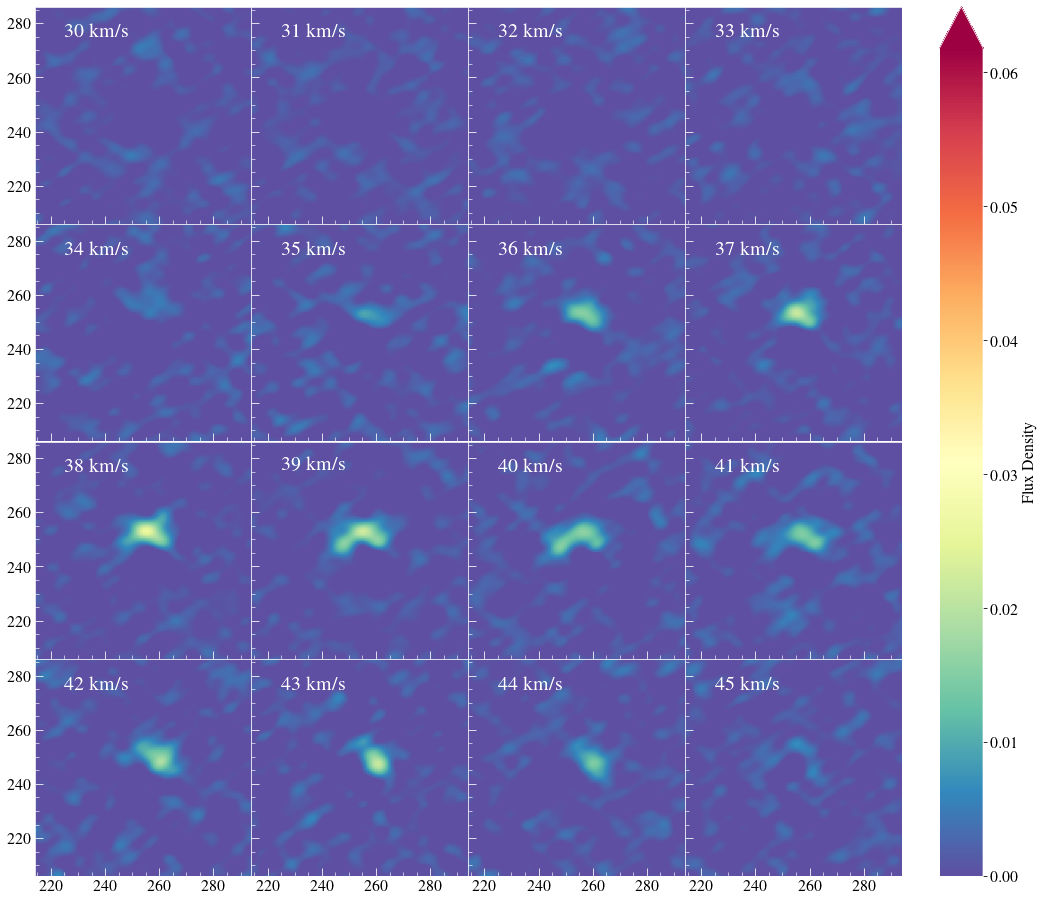

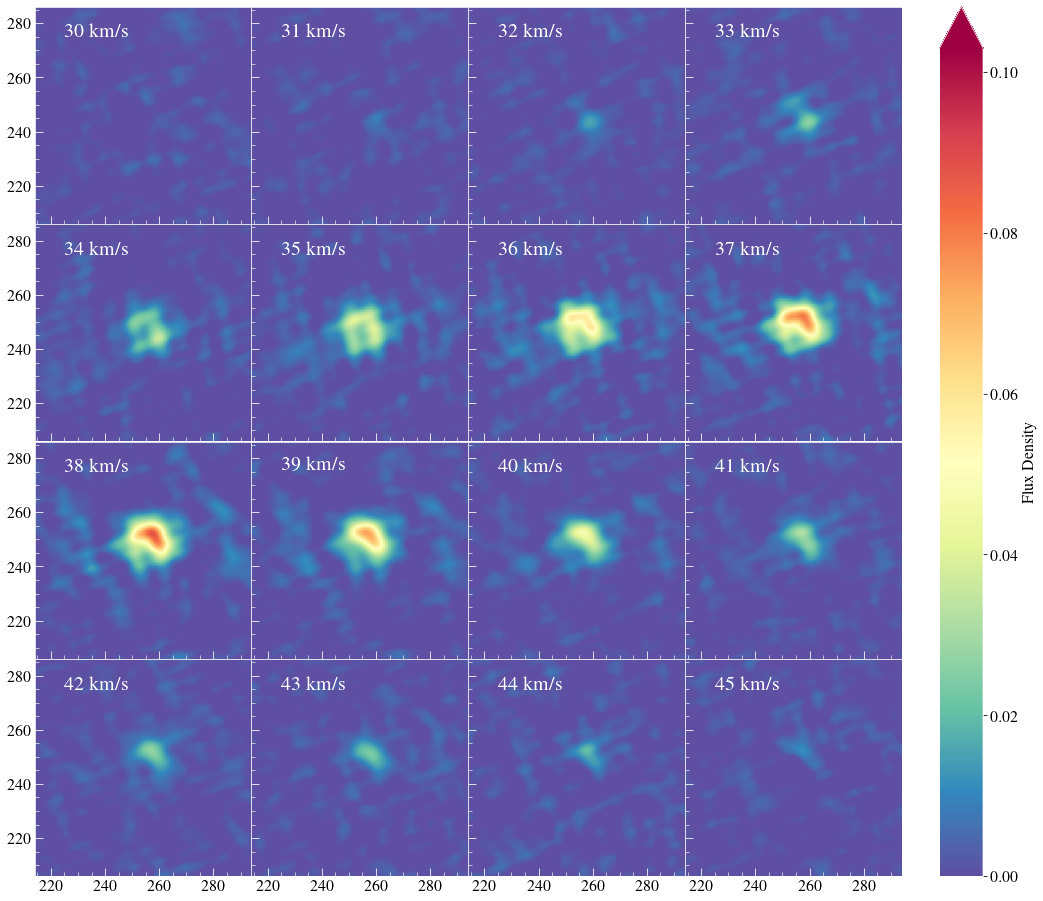

In [17]:
# make maps for each line

make_channel_map('WHya_H2O.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_H2O.clean.image.fits', epoch=2)


In [24]:
'''make_channel_map('WHya_SO_3sigma0.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_SO_3sigma0.clean.image.fits', epoch=2)'''

"make_channel_map('WHya_SO_3sigma0.clean.image.fits', epoch=1)\nmake_channel_map('WHya_ep2_SO_3sigma0.clean.image.fits', epoch=2)"

Making map for  WHya_29SiO_v5
(1, 90, 512, 512)
The vels are [24.         26.13333333 28.26666667 30.4        32.53333333 34.66666667
 36.8        38.93333333 41.06666667 43.2        45.33333333 47.46666667
 49.6        51.73333333 53.86666667 56.        ]
Making map for  WHya_ep2_29SiO_v5
The vels are [24.         26.13333333 28.26666667 30.4        32.53333333 34.66666667
 36.8        38.93333333 41.06666667 43.2        45.33333333 47.46666667
 49.6        51.73333333 53.86666667 56.        ]


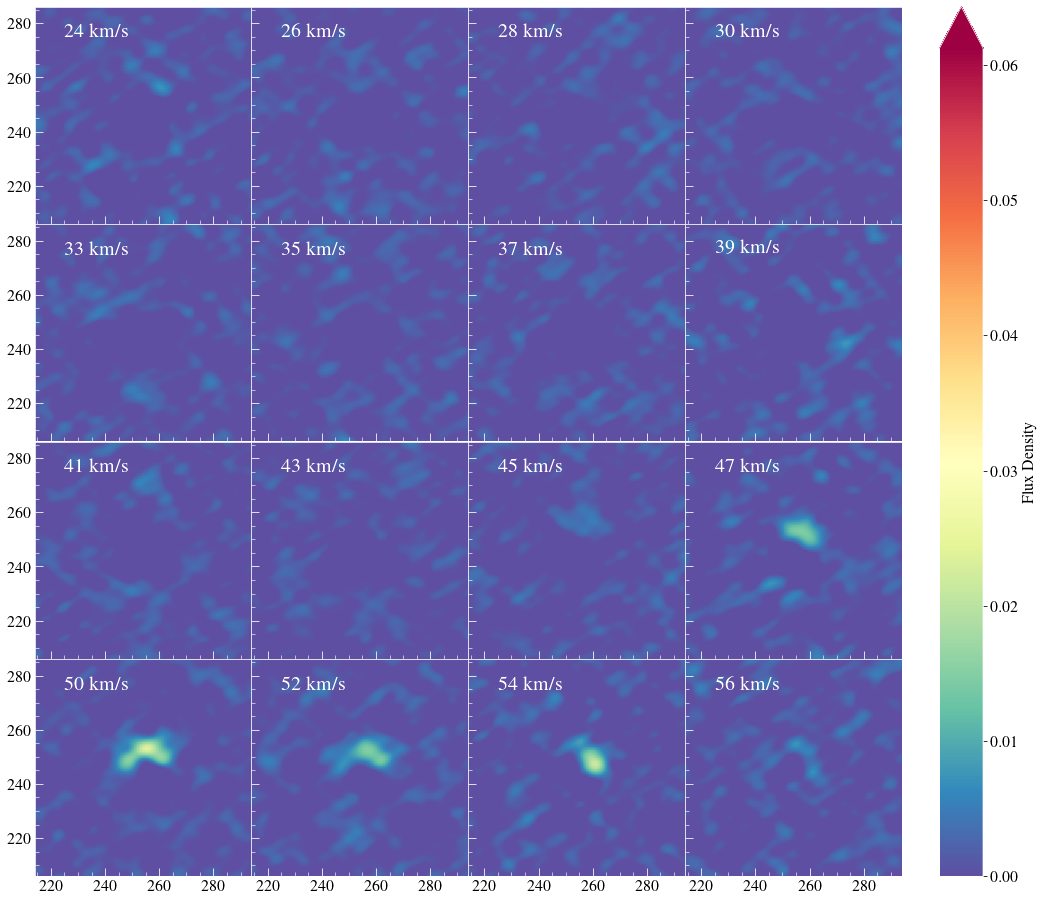

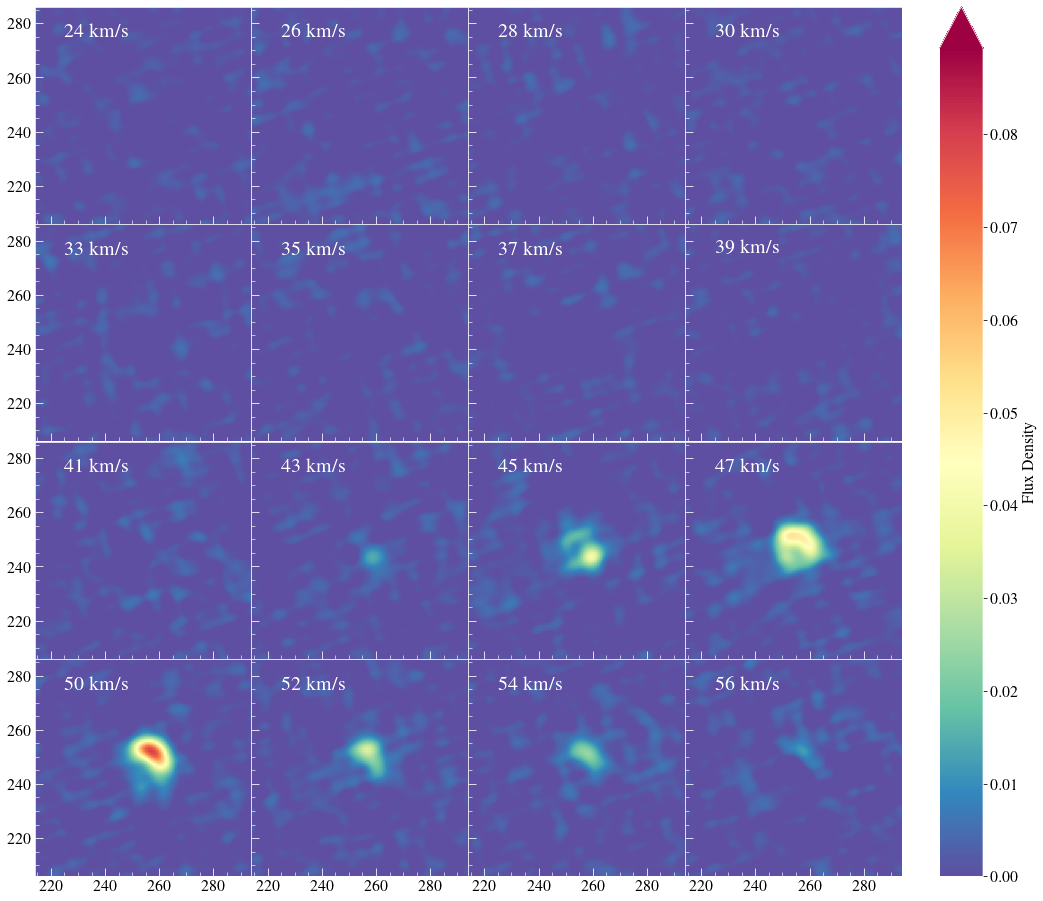

In [31]:
make_channel_map('WHya_29SiO_v5.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_29SiO_v5.clean.image.fits', epoch=2)

Making map for  WHya_SiO_v2
(1, 90, 512, 512)
The vels are [24.         26.13333333 28.26666667 30.4        32.53333333 34.66666667
 36.8        38.93333333 41.06666667 43.2        45.33333333 47.46666667
 49.6        51.73333333 53.86666667 56.        ]
Making map for  WHya_ep2_SiO_v-2
The vels are [24.         26.13333333 28.26666667 30.4        32.53333333 34.66666667
 36.8        38.93333333 41.06666667 43.2        45.33333333 47.46666667
 49.6        51.73333333 53.86666667 56.        ]


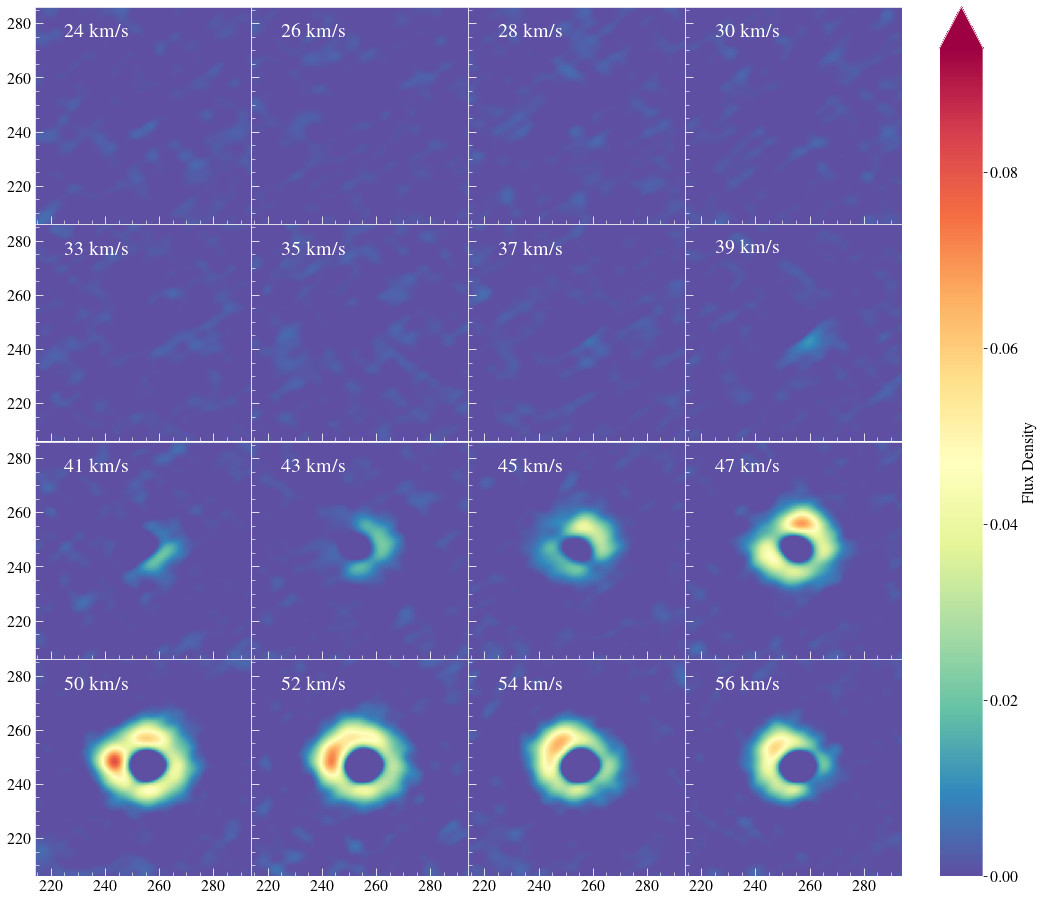

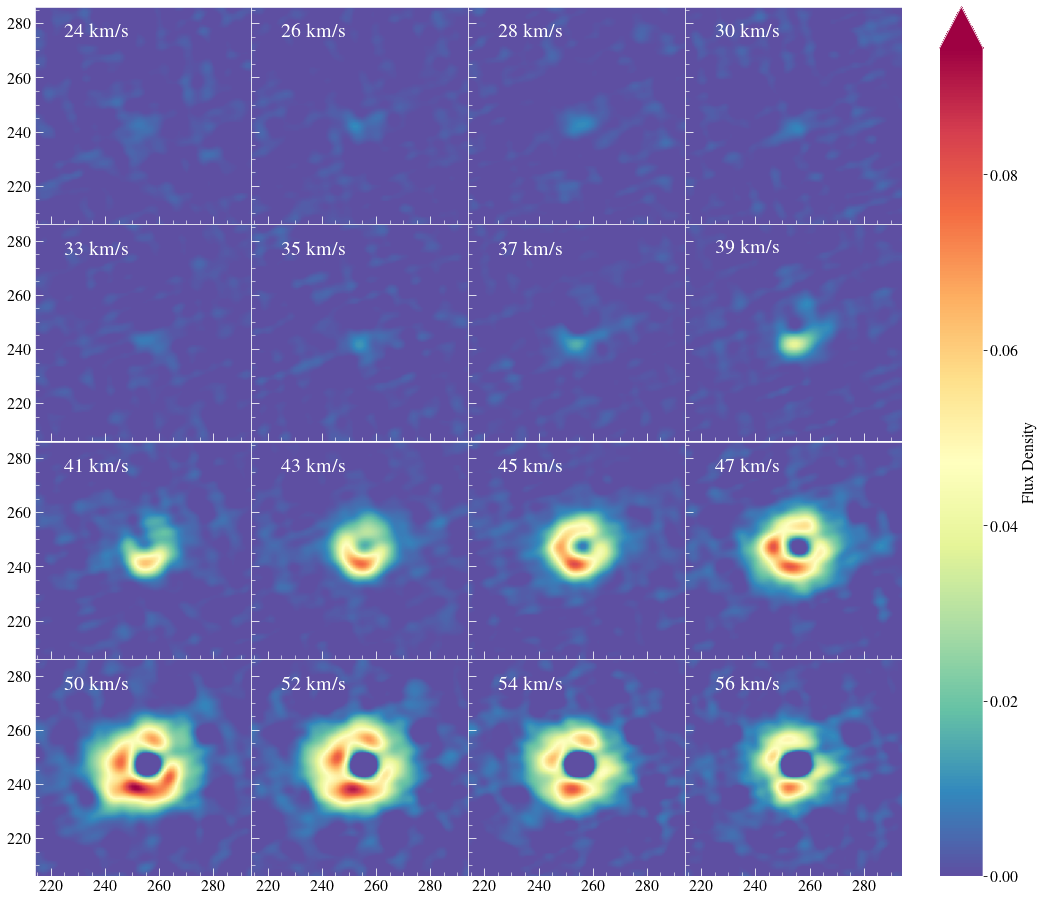

In [32]:
make_channel_map('WHya_SiO_v2.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_SiO_v-2.clean.image.fits', epoch=2)

Making map for  WHya_SiO_v7
(1, 90, 512, 512)
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
Making map for  WHya_ep2_SiO_v7
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]


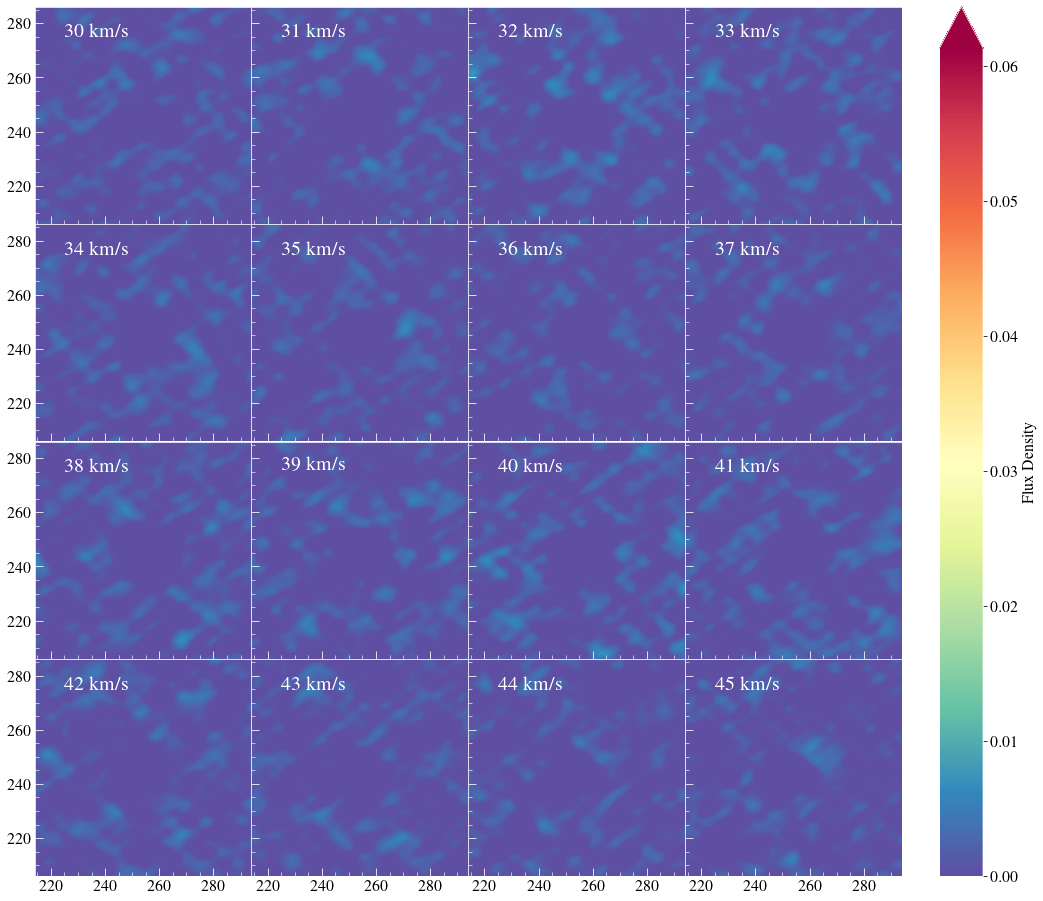

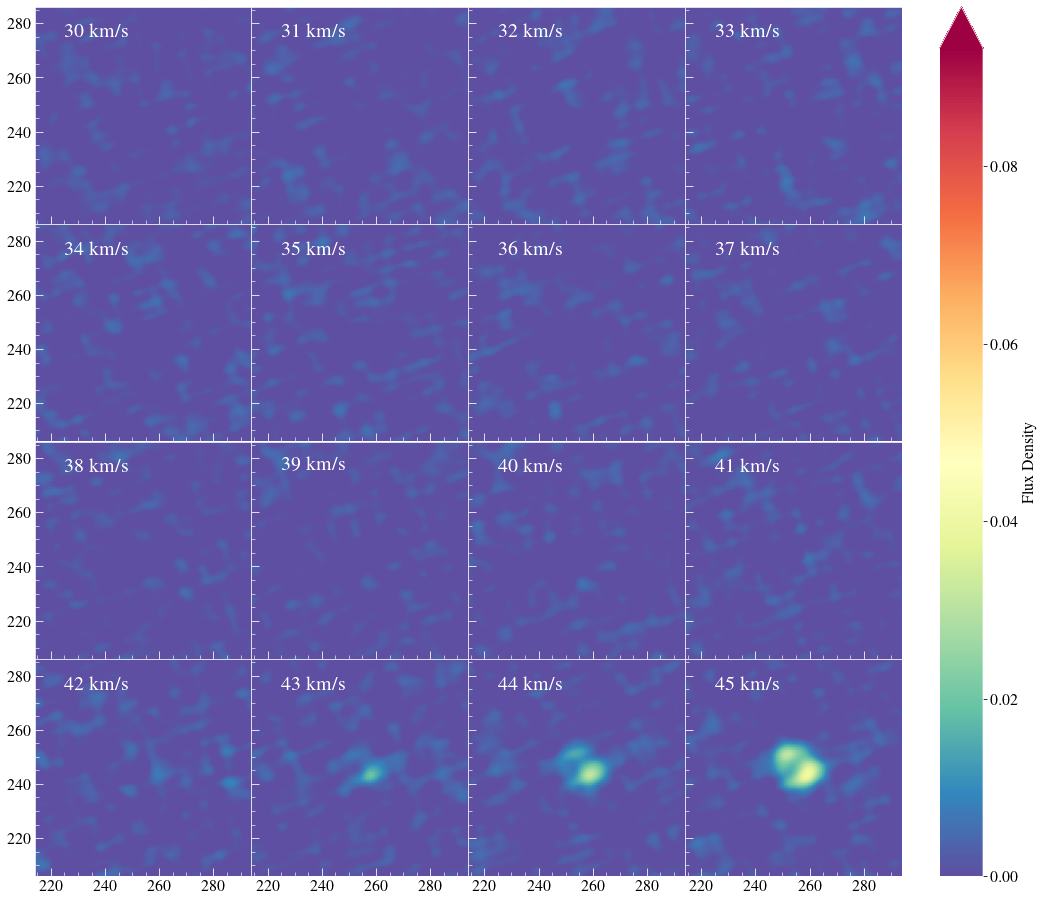

In [27]:
make_channel_map('WHya_SiO_v7.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_SiO_v7.clean.image.fits', epoch=2)

Making map for  WHya_CO_v-1
(1, 90, 512, 512)
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]
Making map for  WHya_ep2_12CO_v-1
The vels are [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.]


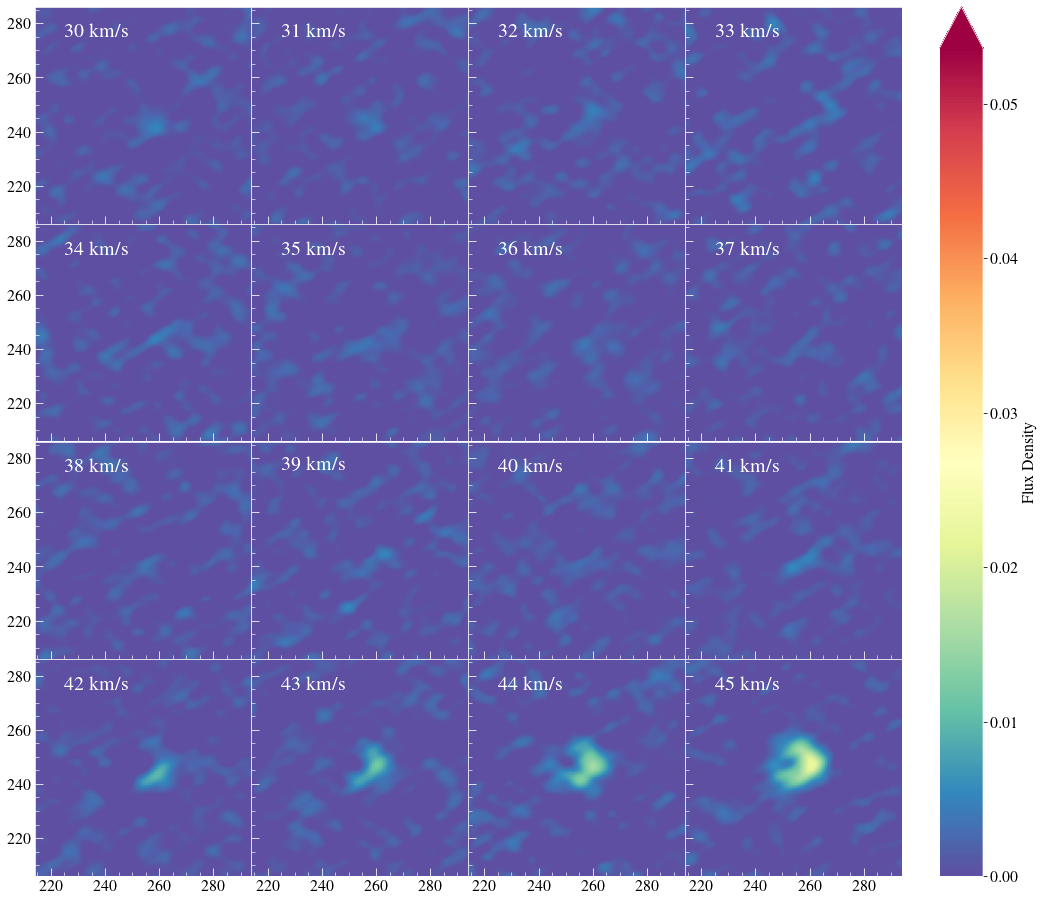

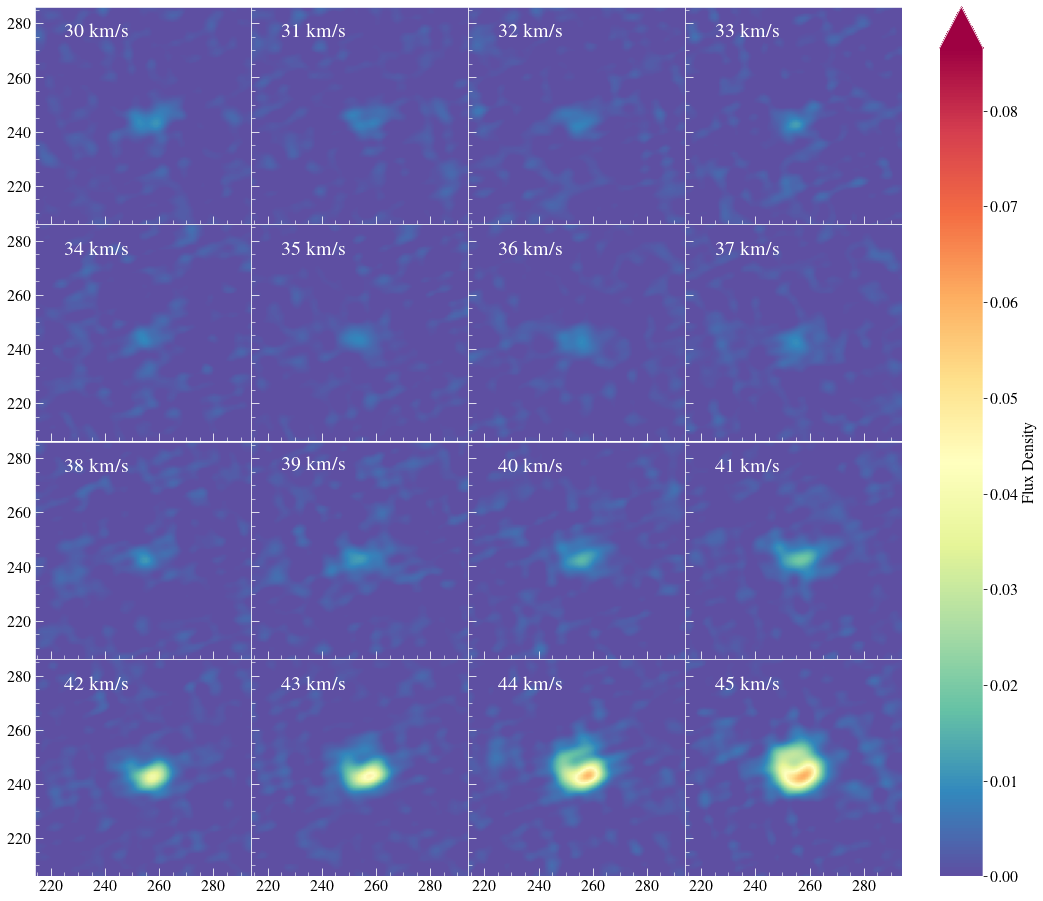

In [29]:
make_channel_map('WHya_CO_v-1.clean.image.fits', epoch=1)
make_channel_map('WHya_ep2_12CO_v-1.clean.image.fits', epoch=2)

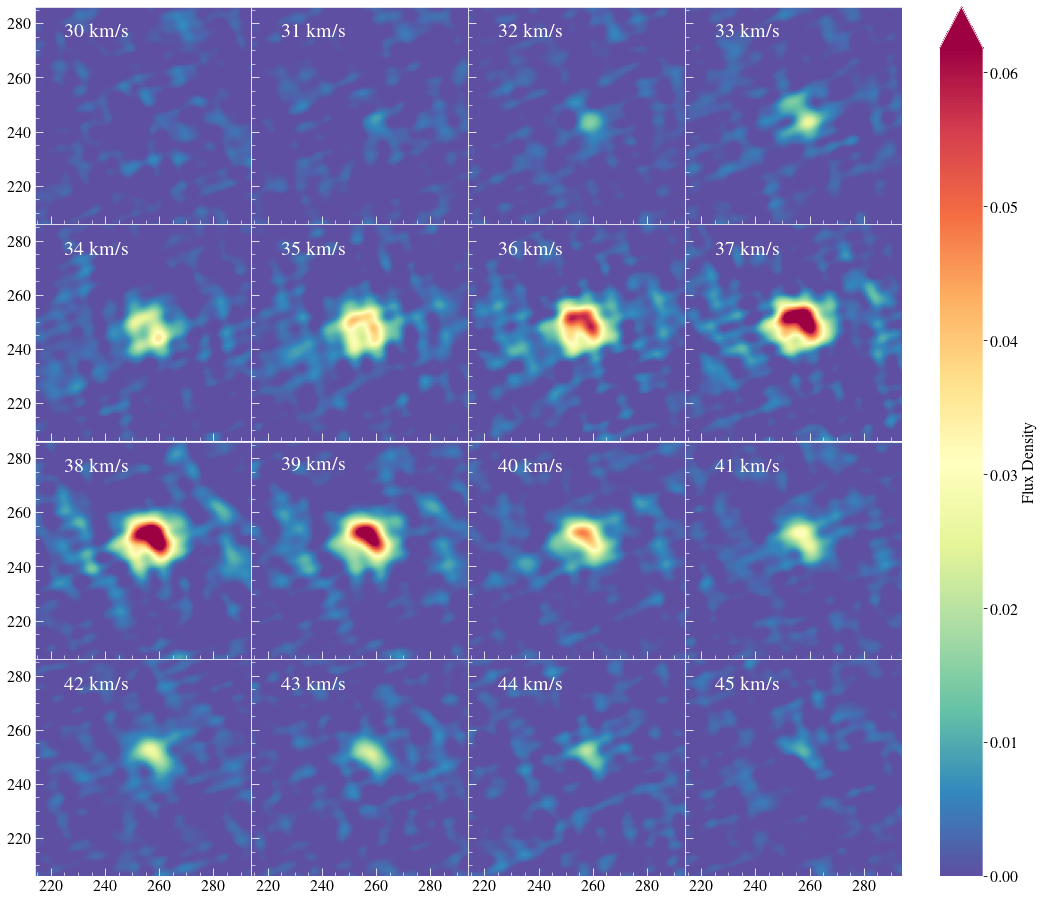

In [194]:


fig, axes = plt.subplots(4, 4, figsize=(17, 16), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        axes[i, j].minorticks_on()
        #global max_value
        #max_value = np.max(H2O_ep2_data, axis=(1, 2, 3))
        im = axes[i, j].imshow(H2O_ep2_data[0, round(vchans[i*4 + j])], vmin=0, vmax=max_value,
                          cmap='Spectral_r')
        
        axes[i, j].tick_params(axis='both', which='minor', direction='in', colors='w', length=4, labelsize=16)
        axes[i, j].tick_params(axis='both', which='major', direction='in', colors='w', length=8, labelsize=16)
        
        axes[i, j].set_xlim(star_center[0]-40, star_center[0]+40)
        axes[i, j].set_ylim(star_center[1]-40, star_center[1]+40)
        
        axes[i, j].text(225, 275, s=str(round(vels[i*4 +j])) + ' km/s', c='w',alpha=1.0, fontsize=20)
        
        # I want the tick labels to be black, still
        plt.setp(axes[i, j].get_xticklabels(), color="k")
        plt.setp(axes[i, j].get_yticklabels(), color="k")

        axes[i, j].spines['bottom'].set_color('w')
        axes[i, j].spines['left'].set_color('w')
        axes[i, j].spines['top'].set_color('w')
        axes[i, j].spines['right'].set_color('w')

plt.subplots_adjust(wspace=0, hspace=0)

cbar = plt.colorbar(im, ax=axes.ravel().tolist(), pad=0.04, fraction=0.046, extend='max')
cbar.set_label('Flux Density', fontsize=16)
cbar.ax.tick_params(labelsize=16)

#plt.tight_layout()


plt.savefig('../figures/h2o_ep2.png', bbox_inches='tight', dpi=300)